<a href="https://colab.research.google.com/github/ThunderKing990/BipedalWalker-PPO/blob/main/Bipedal_Walker_Final_PPO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/mandrakedrink/PPO-pytorch
!wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/setup_colab.sh -O- | bash
!pip install gym==0.15.3
!pip install box2d-py
!pip install gym[box2d]   # 2d-boxes envs

# requirements for virtual display
!apt install python-opengl 
!apt install ffmpeg
!apt install xvfb
!pip install pyvirtualdisplay
!pip install xvfbwrapper


from pyvirtualdisplay import Display
import sys

# Add ppo module in system path
sys.path.append("PPO-pytorch/")

# Start virtual display
display = Display(visible=0, size=(600, 400))
display.start()

fatal: destination path 'PPO-pytorch' already exists and is not an empty directory.
mkdir: cannot create directory ‘./roms’: File exists
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 13.4 MB/s 
     |████████████████████████████████| 1.0 MB 51.5 MB/s 
  Using cached cloudpickle-1.2.2-py2.py3-none-any.whl (25 kB)
  Created wheel for gym: filename=gym-0.15.3-py3-none-any.whl size=1644968 sha256=bb5408fc3a81f287ce4bc5bedc932b7737a22a625def0b50a236c4d15320ea73
  Stored in directory: /root/.cache/pip/wheels/9b/b4/52/f4cce4bdc360a2289a3433deaa062ceb13dbe429c342866e97
Successfully built gym
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 1.5.0
    Uninstalling cloudpickle-1.5.0:
      Successfully uninstalled cloudpickle-1.5.0
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0

In [ ]:
import numpy as np
import torch
import random
import matplotlib.pyplot as plt

import gym

from ppo.ppo import PPOAgent
from wrappers import (BipedalWalkerRewardWrapper)
from utils import show_video, convert_gif

In [ ]:
class GlobalConfig:
    def __init__(self):
        self.seed = 555
        self.path2save_train_history = "/content/"

def seed_everything(seed: int):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

config = GlobalConfig()
seed_everything(config.seed)

In [ ]:
def make_env():
    # environment
    env_id = "BipedalWalker-v2"
    env = gym.make(env_id)
    env = BipedalWalkerRewardWrapper(env)
    env.seed(config.seed)
    return env 

In [ ]:
agent = PPOAgent(
    make_env,
    obs_dim = 24,
    act_dim = 4,
    gamma = 0.99,
    lamda = 0.95,
    entropy_coef = 0.0003,
    epsilon = 0.2,
    value_range = 0.5,
    rollout_len = 8000,
    total_rollouts = 5000,
    num_epochs = 70,
    batch_size = 2000,
    is_evaluate = False,
    continuous = True,
    solved_reward = 250,
    actor_lr = 1e-4,
    critic_lr = 1e-4,
    path2save_train_history = config.path2save_train_history,
)

device: cpu


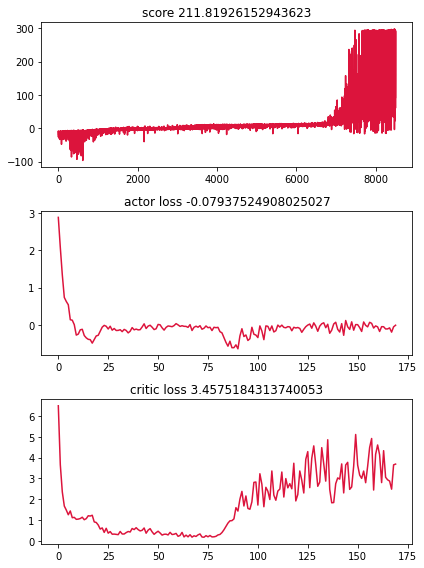

Congratulations, it's solved!
CPU times: user 32min 42s, sys: 15.6 s, total: 32min 58s
Wall time: 33min


In [ ]:
%%time
agent.train()

In [ ]:
agent.env =  gym.wrappers.Monitor(agent.env, "BipedalWalker-v3/videos", force=True)
agent.evaluate()

In [ ]:
show_video("/content/BipedalWalker-v3/videos")

In [ ]:
convert_gif("/content/BipedalWalker-v3/videos")

total frames: 101
